In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import vaex

In [2]:
df_pd = pd.read_csv("marketing_campaign.csv", delimiter="\t")
df = vaex.from_pandas(df_pd)

In [3]:
df.head(5)

#,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
df.shape

(2240, 29)

In [5]:
df.info()

column,type,unit,description,expression
ID,int64,,,
Year_Birth,int64,,,
Education,str,,,
Marital_Status,str,,,
Income,float64,,,
Kidhome,int64,,,
Teenhome,int64,,,
Dt_Customer,str,,,
Recency,int64,,,
MntWines,int64,,,


In [6]:
# Using join with vaex
df[["ID","Year_Birth"]].join(df[["ID","Education"]],
                            left_on="ID",right_on="ID").head(5)

#,ID,Year_Birth,Education
0,5524,1957,Graduation
1,2174,1954,Graduation
2,4141,1965,Graduation
3,6182,1984,Graduation
4,5324,1981,PhD


In [7]:
df["Marital_Status"].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
dtype: int64

In [8]:
# df["Marital_Status"].str.replace("Single","Single_modified")

In [9]:
# Non-nan values
df.count("*")

array(2240)

In [10]:
[print(col,df[col].isna().sum()) for col in df.column_names]

ID 0
Year_Birth 0
Education 0
Marital_Status 0
Income 24
Kidhome 0
Teenhome 0
Dt_Customer 0
Recency 0
MntWines 0
MntFruits 0
MntMeatProducts 0
MntFishProducts 0
MntSweetProducts 0
MntGoldProds 0
NumDealsPurchases 0
NumWebPurchases 0
NumCatalogPurchases 0
NumStorePurchases 0
NumWebVisitsMonth 0
AcceptedCmp3 0
AcceptedCmp4 0
AcceptedCmp5 0
AcceptedCmp1 0
AcceptedCmp2 0
Complain 0
Z_CostContact 0
Z_Revenue 0
Response 0


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [11]:
df["Income"].countnan()

24

In [12]:
# Dropping columns which are not useful
df = df.drop(columns=["Z_CostContact","Z_Revenue"])
df.head(5)

#,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


In [13]:
column_names = df.column_names
#column_names.remove("Response")

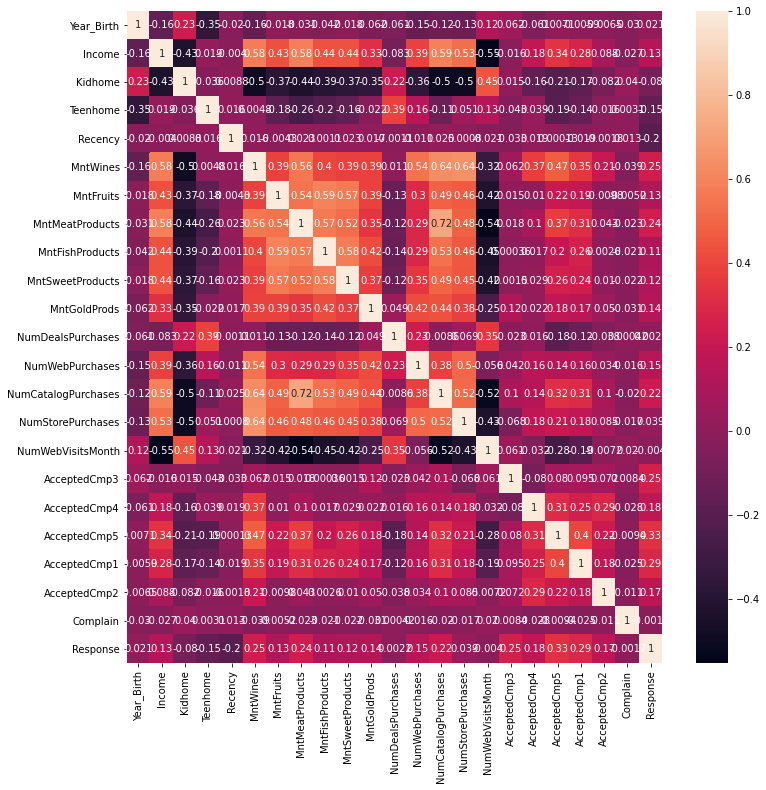

In [14]:
# With vaex it is so hard to get correlation.
# Because of that i use pandas to show corr matrix.

plt.figure(figsize=(12,12))
sns.heatmap(df_pd.drop(["ID","Z_CostContact",
                        "Z_Revenue"],axis=1).corr(), annot=True)
plt.show()

In [15]:
# Get correlated features.
df_pd.corr().abs().unstack().sort_values(ascending=False)[27:35:2]

MntWines             NumStorePurchases      0.642100
NumCatalogPurchases  MntWines               0.635226
MntFruits            MntFishProducts        0.594804
Income               NumCatalogPurchases    0.589162
dtype: float64

In [16]:
# Fill Income with mean.
df["Income"] = df["Income"].fillna(df["Income"].mean())
df["Income"].countnan()

0

In [17]:
df.head()

#,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
5,7446,1967,Master,Together,62513,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,0
6,965,1971,Graduation,Divorced,55635,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,0
7,6177,1985,PhD,Married,33454,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,0
8,4855,1974,PhD,Together,30351,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,1
9,5899,1950,PhD,Together,5648,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,0


In [18]:
df["Marital_Status"] = df.func.where(df["Marital_Status"].isin(["Married","Together"]),"Relation","Single")

In [19]:
df["Marital_Status"].value_counts()

Relation    1444
Single       796
dtype: int64

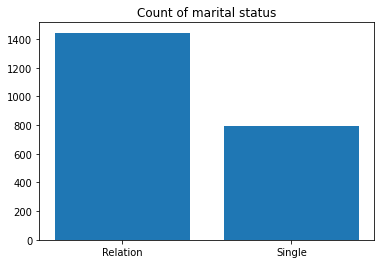

In [20]:
plt.bar(df["Marital_Status"].value_counts().keys(),
       df["Marital_Status"].value_counts().values)
plt.title("Count of marital status")
plt.show()

In [21]:
# Combine different features to another features

df["TotalKids"] = df["Kidhome"]+df["Teenhome"]
df["TotalAmount"] = df["MntWines"]+df["MntFruits"]+df["MntMeatProducts"]+\
df["MntFishProducts"]+df["MntSweetProducts"]+df["MntGoldProds"]
df["TotalCampaigns"] = df["AcceptedCmp1"]+df["AcceptedCmp2"]+df["AcceptedCmp3"]+\
df["AcceptedCmp4"]+df["AcceptedCmp5"]+df["Response"]
df["TotalPurchase"] = df["NumWebPurchases"]+df["NumCatalogPurchases"]+\
df["NumStorePurchases"]+df["NumDealsPurchases"]

In [22]:
# Reduce dimensionality

col_del = ["AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , 
           "AcceptedCmp4","AcceptedCmp5", "Response",
           "NumWebVisitsMonth", "NumWebPurchases",
           "NumCatalogPurchases","NumStorePurchases",
           "NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", 
           "MntFruits", "MntMeatProducts", "MntFishProducts", 
           "MntSweetProducts", "MntGoldProds"]

In [23]:
df = df.drop(columns=col_del).copy()

In [24]:
df.head()

#,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,TotalKids,TotalAmount,TotalCampaigns,TotalPurchase
0,5524,1957,Graduation,Single,58138,04-09-2012,58,0,0,1617,1,25
1,2174,1954,Graduation,Single,46344,08-03-2014,38,0,2,27,0,6
2,4141,1965,Graduation,Relation,71613,21-08-2013,26,0,0,776,0,21
3,6182,1984,Graduation,Relation,26646,10-02-2014,26,0,1,53,0,8
4,5324,1981,PhD,Relation,58293,19-01-2014,94,0,1,422,0,19
5,7446,1967,Master,Relation,62513,09-09-2013,16,0,1,716,0,22
6,965,1971,Graduation,Single,55635,13-11-2012,34,0,1,590,0,21
7,6177,1985,PhD,Relation,33454,08-05-2013,32,0,1,169,0,10
8,4855,1974,PhD,Relation,30351,06-06-2013,19,0,1,46,1,6
9,5899,1950,PhD,Relation,5648,13-03-2014,68,0,2,49,1,2


In [25]:
df["Education"].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
dtype: int64

In [26]:
# Converting datetime is so hard.

df_pd["Dt_Customer"] = pd.to_datetime(df_pd["Dt_Customer"])

df["Dt_year"] = df_pd["Dt_Customer"].dt.year.values
df["Dt_month"] = df_pd["Dt_Customer"].dt.month.values
df["Dt_day"] = df_pd["Dt_Customer"].dt.day.values

In [27]:
df.head()

#,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,TotalKids,TotalAmount,TotalCampaigns,TotalPurchase,Dt_year,Dt_month,Dt_day
0,5524,1957,Graduation,Single,58138,04-09-2012,58,0,0,1617,1,25,2012,4,9
1,2174,1954,Graduation,Single,46344,08-03-2014,38,0,2,27,0,6,2014,8,3
2,4141,1965,Graduation,Relation,71613,21-08-2013,26,0,0,776,0,21,2013,8,21
3,6182,1984,Graduation,Relation,26646,10-02-2014,26,0,1,53,0,8,2014,10,2
4,5324,1981,PhD,Relation,58293,19-01-2014,94,0,1,422,0,19,2014,1,19
5,7446,1967,Master,Relation,62513,09-09-2013,16,0,1,716,0,22,2013,9,9
6,965,1971,Graduation,Single,55635,13-11-2012,34,0,1,590,0,21,2012,11,13
7,6177,1985,PhD,Relation,33454,08-05-2013,32,0,1,169,0,10,2013,8,5
8,4855,1974,PhD,Relation,30351,06-06-2013,19,0,1,46,1,6,2013,6,6
9,5899,1950,PhD,Relation,5648,13-03-2014,68,0,2,49,1,2,2014,3,13


In [28]:
df.groupby(by="Marital_Status").agg({"Income":["min","mean","max"]})

#,Marital_Status,Income_min,Income_mean,Income_max
0,Single,1730,52090.9,153924
1,Relation,2447,52333.4,666666


In [29]:
df.groupby(by="Dt_year").agg({"Income":["min","mean","max"]})

#,Dt_year,Income_min,Income_mean,Income_max
0,2013,2447,52429.6,666666
1,2014,1730,52823.1,157243
2,2012,6835,51159.1,160803
